In [13]:
import pandas as pd
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import numpy as np


import matplotlib.cm as cm
import joblib

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from sklearn_extra.cluster  import KMedoids
from sklearn.preprocessing import RobustScaler

In [78]:
def load_image(path, print=False):
    '''
    Load an image from a given path. This function returns the pixels matrix, each cell of the matrix is a 
    3-dimensional array with the RGB components of the pixel.
    '''
    image_matrix = imageio.imread(path)

    columns = len(image_matrix)
    rows = len(image_matrix[0])
    data = []

    for i in range(columns):
        for j in range(rows):
            color = image_matrix[i][j]
            R, G, B = color[0], color[1], color[2]
            data.append([R, G, B])

    data_frame = pd.DataFrame(columns=['R', 'G', 'B'], data=data)

    if print :   
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
        axes[0] = plt.axes(projection='3d')
        axes[0].set_anchor('W')
        axes[0].scatter3D(data_frame.loc[:,"R"], data_frame.loc[:,"G"], data_frame.loc[:,"B"], c=data_frame/255.0)
        axes[1].imshow(image_matrix)

        fig.tight_layout()

    return image_matrix


In [82]:
path='datos/archive/Abstract_Expressionism/aaron-siskind_acolman-1-1955.jpg'
image_matrix = load_image(path=path, print=True)

In [80]:
path='datos/archive/Analytical_Cubism/albert-gleizes_acrobats-1916.jpg'
image_matrix = load_image(path=path, print=True)

In [77]:
path='datos/archive/Impressionism/adam-baltatu_meridional-landscape.jpg'
image_matrix = load_image(path=path, print=True)

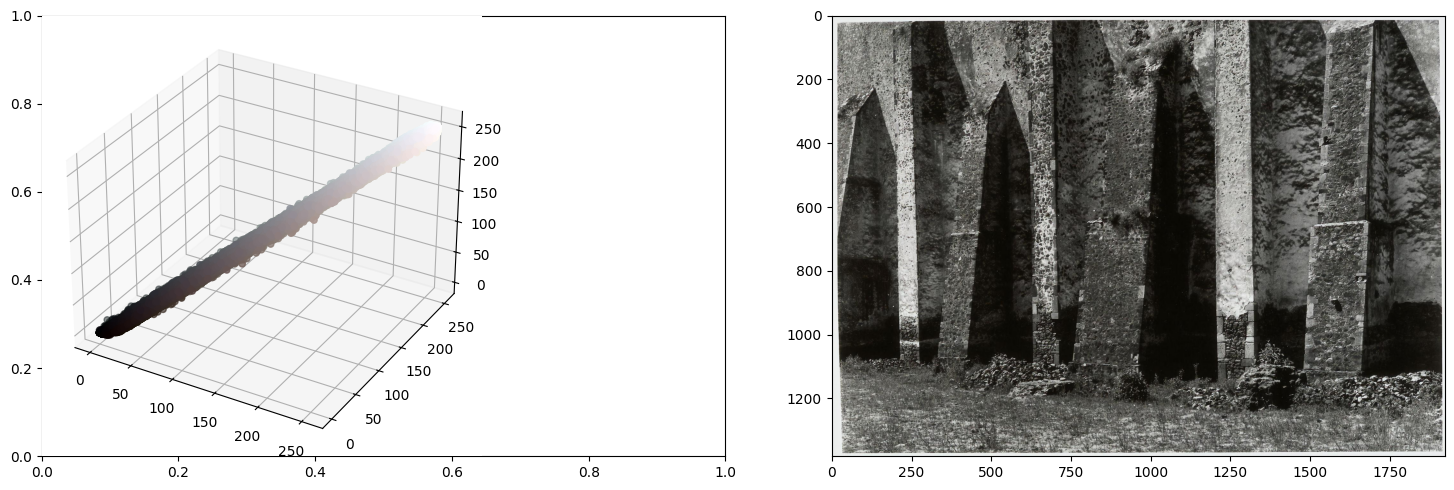

In [83]:
image_matrix = load_image(path=path, print=True)

In [8]:
def elbow_plot(X, model, k_min=2, k_max=10):
    """
    Genera la gráfica para el método del codo usando KMeans
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    inertias = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, metric='manhattan', random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el valor de inercia
        inertias.append(model_k.inertia_)
    
    # Graficamos los valores de inercia
    plt.plot(range(k_min,k_max+1), inertias, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Inercia')
    plt.grid()
    plt.show()

In [9]:
def silhouette_plot(X, model, k_min=2, k_max=5):
    """
    Genera la gráfica con el coeficiente de la silueta
    
    Parametros:
    X : np.array
        El arreglo con los datos
    model : str
        "kmeans" o "kmedoids", especifica el modelo a entrenar.
    k_min : int
        Valor mínimo para k
    k_max : int
        Valor máximo para k
    """
    scores = []
    for i in range(k_min, k_max+1):
        if model == "kmeans":
            model_k = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
        else:
            model_k = KMedoids(n_clusters=i, max_iter=300, random_state=0)
        # Entrenamos el modelo
        model_k.fit(X)
        # Almacenamos el coeficiente de la silueta
        score = silhouette_score(X, model_k.labels_)
        scores.append(score)
    # Mostramos los valores de los coeficientes
    display(pd.DataFrame({'K': range(k_min,k_max+1), 'Coeficiente': scores}))
    # Graficamos los valores del coeficiente de la silueta
    plt.plot(range(k_min,k_max+1), scores, marker='o')
    plt.xlabel('Número de clústeres')
    plt.ylabel('Silhouette Score')
    plt.grid()
    plt.show()

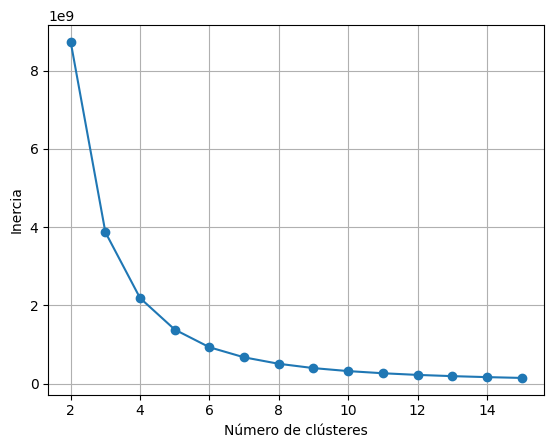

In [42]:
elbow_plot(data, "kmeans", 2, 15)

In [8]:
elbow_plot(data, "kmedoids", 2, 15)

: 

In [11]:
mejor_modelo = KMeans(n_clusters=6, random_state=0)
mejor_modelo.fit(data)

/Users/damenac/workspaces/maia/.venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=0)

([<matplotlib.axis.XTick at 0x284139850>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

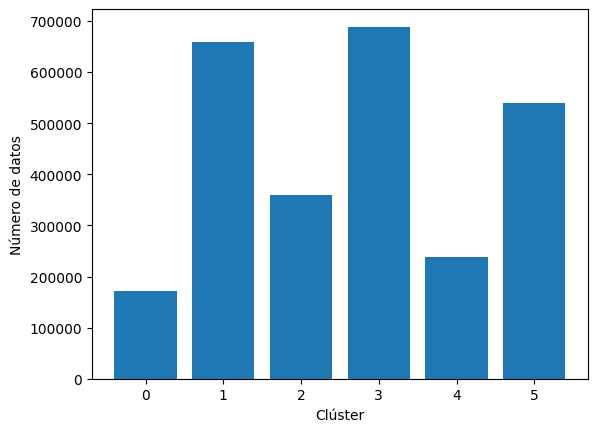

In [14]:
labels = mejor_modelo.labels_
indexes, values = np.unique(labels, return_counts=True)
rects = plt.bar(indexes, values)
plt.xlabel('Clúster')
plt.ylabel('Número de datos')
plt.xticks(indexes)